Hem treballat amb models regressius per a fer una predicció de quan trigarà a trobar feina una persona a partir de les dades presents al csv df_saes_ins

També hem graficat la correlació de les característiques amb la previsió per tal de donar més informació al client envers quins factors poden tenir més influència en el temps que triga la persona a trobar feina

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('df_saes_ins.csv')
df.head()
df_i=df

In [3]:
df.shape

(90, 41)

In [4]:
df=df[['ID','Adreça principal - Codi postal','Data Naixement','Gènere',"Tipus d'identificació",'Tipus de relacions actuals','Vinculació discapacitat auditiva','Nº persones a unitat familiar','Té certificat CAD',"% Grau Discapacitat",'Temps CAD','On sordesa','Rep ajut econòmic?','Presenta pluridiscapacitat?','Tipus pluridiscapacitat','Pren medicació','Tipus de sordesa','Moment apareix sordesa','Causa pèrdua auditiva','Porta audiòfon?','Porta implant coclear?','On implant coclear','Sistema de comunicació','Nivell formatiu','Data incorporació mercat laboral','Temps total experiència',"Nombre d'experiències",'Quantitat seguiments','Data inici de contracte o col·locació','Data alta','Data alta2','Data alta3']]
df.head()

,ID,Adreça principal - Codi postal,Data Naixement,Gènere,Tipus d'identificació,Tipus de relacions actuals,Vinculació discapacitat auditiva,Nº persones a unitat familiar,Té certificat CAD,% Grau Discapacitat,...,Sistema de comunicació,Nivell formatiu,Data incorporació mercat laboral,Temps total experiència,Nombre d'experiències,Quantitat seguiments,Data inici de contracte o col·locació,Data alta,Data alta2,Data alta3
0,e026d35a-d5d1-8a8f-1e3b-5bb4a04155e9,8025.0,13/05/1970,Femení,NIF,"Persones Sòcies Individuals,Participant Xarxa ...",Afectat/da,1.0,Sí,33.0,...,Oral,Universitat,NaN,0.0,3.0,22.0,2022-11-17,2012-02-17,2019-01-01,2022-03-25
1,6112510d-1b9f-8e36-cd90-5bb4a03f782c,8028.0,07/01/1981,Masculí,NIF,"Persones Usuàries,Persones Sòcies Familiars (N...",Afectat/da,4.0,NaN,73.0,...,Oral,NaN,NaN,NaN,NaN,17.0,2020-06-10,2003-12-04,2019-01-01,2022-05-02
2,1156db83-09ae-9a70-c181-5bb4a0c04248,8030.0,13/12/1985,Masculí,NIF,Participant SAES,Afectat/da,3.0,Sí,34.0,...,Bimodal,NaN,NaN,0.0,4.0,77.0,2022-10-18,2012-09-19,2019-02-07,2022-06-09
3,9a90727c-cecc-b902-c583-5bb4a06c1275,8030.0,20/03/1998,Femení,NIF,"Participant Xarxa de Dones,Persones Sòcies Fam...",Afectat/da,4.0,Sí,66.0,...,Oral,NaN,NaN,NaN,NaN,77.0,2022-09-27,2000-05-29,2019-01-01,2021-01-27
4,6704c81d-eb69-25ce-21a8-5bb4a0279057,8906.0,26/06/1971,Masculí,NIF,Participant SAES,Afectat/da,1.0,Sí,68.0,...,Bimodal,Formació Professional,2009-01-01,4374.0,1.0,49.0,2022-10-18,1998-01-30,2021-02-01,2023-03-06


In [5]:
# Importa pandas y numpy
import pandas as pd
import numpy as np

# Convierte la columna de fecha de nacimiento a tipo datetime
df['Data Naixement'] = pd.to_datetime(df['Data Naixement'])

# Calcula la edad y agrega la columna al DataFrame
fecha_actual = pd.to_datetime('today')
df['Edat'] = ((fecha_actual - df['Data Naixement']) / np.timedelta64(1, 'Y')).astype(int)

# Elimina la columna de fecha de nacimiento si lo deseas
df = df.drop('Data Naixement', axis=1)
df.head()

/tmp/ipykernel_12253/3844225026.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Data Naixement'] = pd.to_datetime(df['Data Naixement'])
/tmp/ipykernel_12253/3844225026.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Data Naixement'] = pd.to_datetime(df['Data Naixement'])
/tmp/ipykernel_12253/3844225026.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

,ID,Adreça principal - Codi postal,Gènere,Tipus d'identificació,Tipus de relacions actuals,Vinculació discapacitat auditiva,Nº persones a unitat familiar,Té certificat CAD,% Grau Discapacitat,Temps CAD,...,Nivell formatiu,Data incorporació mercat laboral,Temps total experiència,Nombre d'experiències,Quantitat seguiments,Data inici de contracte o col·locació,Data alta,Data alta2,Data alta3,Edat
0,e026d35a-d5d1-8a8f-1e3b-5bb4a04155e9,8025.0,Femení,NIF,"Persones Sòcies Individuals,Participant Xarxa ...",Afectat/da,1.0,Sí,33.0,NaN,...,Universitat,NaN,0.0,3.0,22.0,2022-11-17,2012-02-17,2019-01-01,2022-03-25,52
1,6112510d-1b9f-8e36-cd90-5bb4a03f782c,8028.0,Masculí,NIF,"Persones Usuàries,Persones Sòcies Familiars (N...",Afectat/da,4.0,NaN,73.0,NaN,...,NaN,NaN,NaN,NaN,17.0,2020-06-10,2003-12-04,2019-01-01,2022-05-02,41
2,1156db83-09ae-9a70-c181-5bb4a0c04248,8030.0,Masculí,NIF,Participant SAES,Afectat/da,3.0,Sí,34.0,Permanent,...,NaN,NaN,0.0,4.0,77.0,2022-10-18,2012-09-19,2019-02-07,2022-06-09,37
3,9a90727c-cecc-b902-c583-5bb4a06c1275,8030.0,Femení,NIF,"Participant Xarxa de Dones,Persones Sòcies Fam...",Afectat/da,4.0,Sí,66.0,Permanent,...,NaN,NaN,NaN,NaN,77.0,2022-09-27,2000-05-29,2019-01-01,2021-01-27,24
4,6704c81d-eb69-25ce-21a8-5bb4a0279057,8906.0,Masculí,NIF,Participant SAES,Afectat/da,1.0,Sí,68.0,NaN,...,Formació Professional,2009-01-01,4374.0,1.0,49.0,2022-10-18,1998-01-30,2021-02-01,2023-03-06,51


In [6]:
df_i=df

In [7]:
#pasar dates a datetimes
df['Data incorporació mercat laboral'] = pd.to_datetime(df['Data incorporació mercat laboral'])
df['Data inici de contracte o col·locació'] = pd.to_datetime(df['Data inici de contracte o col·locació'])
df['Data alta'] = pd.to_datetime(df['Data alta'])
df['Data alta2'] = pd.to_datetime(df['Data alta2'], format='%Y-%m-%d')
df['Data alta3'] = pd.to_datetime(df['Data alta3'], format='%Y-%m-%d')

df.head()

,ID,Adreça principal - Codi postal,Gènere,Tipus d'identificació,Tipus de relacions actuals,Vinculació discapacitat auditiva,Nº persones a unitat familiar,Té certificat CAD,% Grau Discapacitat,Temps CAD,...,Nivell formatiu,Data incorporació mercat laboral,Temps total experiència,Nombre d'experiències,Quantitat seguiments,Data inici de contracte o col·locació,Data alta,Data alta2,Data alta3,Edat
0,e026d35a-d5d1-8a8f-1e3b-5bb4a04155e9,8025.0,Femení,NIF,"Persones Sòcies Individuals,Participant Xarxa ...",Afectat/da,1.0,Sí,33.0,NaN,...,Universitat,NaT,0.0,3.0,22.0,2022-11-17,2012-02-17,2019-01-01,2022-03-25,52
1,6112510d-1b9f-8e36-cd90-5bb4a03f782c,8028.0,Masculí,NIF,"Persones Usuàries,Persones Sòcies Familiars (N...",Afectat/da,4.0,NaN,73.0,NaN,...,NaN,NaT,NaN,NaN,17.0,2020-06-10,2003-12-04,2019-01-01,2022-05-02,41
2,1156db83-09ae-9a70-c181-5bb4a0c04248,8030.0,Masculí,NIF,Participant SAES,Afectat/da,3.0,Sí,34.0,Permanent,...,NaN,NaT,0.0,4.0,77.0,2022-10-18,2012-09-19,2019-02-07,2022-06-09,37
3,9a90727c-cecc-b902-c583-5bb4a06c1275,8030.0,Femení,NIF,"Participant Xarxa de Dones,Persones Sòcies Fam...",Afectat/da,4.0,Sí,66.0,Permanent,...,NaN,NaT,NaN,NaN,77.0,2022-09-27,2000-05-29,2019-01-01,2021-01-27,24
4,6704c81d-eb69-25ce-21a8-5bb4a0279057,8906.0,Masculí,NIF,Participant SAES,Afectat/da,1.0,Sí,68.0,NaN,...,Formació Professional,2009-01-01,4374.0,1.0,49.0,2022-10-18,1998-01-30,2021-02-01,2023-03-06,51


In [8]:
#pasamos los valors nans en Adreça principal - Codi postal a 0
df['Adreça principal - Codi postal'] = df['Adreça principal - Codi postal'].fillna(0)

In [9]:
#ponemos 0 delante de Adreça principal - Codi postal en los casos necesarios
df['Adreça principal - Codi postal'] = df['Adreça principal - Codi postal'].astype(int).astype(str).str.zfill(5)
df.head()

,ID,Adreça principal - Codi postal,Gènere,Tipus d'identificació,Tipus de relacions actuals,Vinculació discapacitat auditiva,Nº persones a unitat familiar,Té certificat CAD,% Grau Discapacitat,Temps CAD,...,Nivell formatiu,Data incorporació mercat laboral,Temps total experiència,Nombre d'experiències,Quantitat seguiments,Data inici de contracte o col·locació,Data alta,Data alta2,Data alta3,Edat
0,e026d35a-d5d1-8a8f-1e3b-5bb4a04155e9,08025,Femení,NIF,"Persones Sòcies Individuals,Participant Xarxa ...",Afectat/da,1.0,Sí,33.0,NaN,...,Universitat,NaT,0.0,3.0,22.0,2022-11-17,2012-02-17,2019-01-01,2022-03-25,52
1,6112510d-1b9f-8e36-cd90-5bb4a03f782c,08028,Masculí,NIF,"Persones Usuàries,Persones Sòcies Familiars (N...",Afectat/da,4.0,NaN,73.0,NaN,...,NaN,NaT,NaN,NaN,17.0,2020-06-10,2003-12-04,2019-01-01,2022-05-02,41
2,1156db83-09ae-9a70-c181-5bb4a0c04248,08030,Masculí,NIF,Participant SAES,Afectat/da,3.0,Sí,34.0,Permanent,...,NaN,NaT,0.0,4.0,77.0,2022-10-18,2012-09-19,2019-02-07,2022-06-09,37
3,9a90727c-cecc-b902-c583-5bb4a06c1275,08030,Femení,NIF,"Participant Xarxa de Dones,Persones Sòcies Fam...",Afectat/da,4.0,Sí,66.0,Permanent,...,NaN,NaT,NaN,NaN,77.0,2022-09-27,2000-05-29,2019-01-01,2021-01-27,24
4,6704c81d-eb69-25ce-21a8-5bb4a0279057,08906,Masculí,NIF,Participant SAES,Afectat/da,1.0,Sí,68.0,NaN,...,Formació Professional,2009-01-01,4374.0,1.0,49.0,2022-10-18,1998-01-30,2021-02-01,2023-03-06,51


In [10]:
df.dtypes

ID                                               object
Adreça principal - Codi postal                   object
Gènere                                           object
Tipus d'identificació                            object
Tipus de relacions actuals                       object
Vinculació discapacitat auditiva                 object
Nº persones a unitat familiar                   float64
Té certificat CAD                                object
% Grau Discapacitat                             float64
Temps CAD                                        object
On sordesa                                       object
Rep ajut econòmic?                               object
Presenta pluridiscapacitat?                      object
Tipus pluridiscapacitat                          object
Pren medicació                                   object
Tipus de sordesa                                 object
Moment apareix sordesa                           object
Causa pèrdua auditiva                           

In [11]:
#dummies
dummy_cols = ['Gènere', "Tipus d'identificació", 'Tipus de relacions actuals','Vinculació discapacitat auditiva','Temps CAD',
'On sordesa','Tipus pluridiscapacitat','Tipus de sordesa','Moment apareix sordesa','Causa pèrdua auditiva','On implant coclear','Sistema de comunicació','Nivell formatiu']
df = pd.get_dummies(df, columns=dummy_cols)
df.head()

,ID,Adreça principal - Codi postal,Nº persones a unitat familiar,Té certificat CAD,% Grau Discapacitat,Rep ajut econòmic?,Presenta pluridiscapacitat?,Pren medicació,Porta audiòfon?,Porta implant coclear?,...,Sistema de comunicació_Bimodal,Sistema de comunicació_Oral,Sistema de comunicació_Signes,Nivell formatiu_Altra formació reglada,Nivell formatiu_Batxillerat (i COU),Nivell formatiu_Educació Primària (i EGB),Nivell formatiu_Educació Secundària,Nivell formatiu_Formació Professional,Nivell formatiu_Formació no reglada,Nivell formatiu_Universitat
0,e026d35a-d5d1-8a8f-1e3b-5bb4a04155e9,08025,1.0,Sí,33.0,No,Sí,No,NaN,NaN,...,0,1,0,0,0,0,0,0,0,1
1,6112510d-1b9f-8e36-cd90-5bb4a03f782c,08028,4.0,NaN,73.0,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
2,1156db83-09ae-9a70-c181-5bb4a0c04248,08030,3.0,Sí,34.0,No,No,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
3,9a90727c-cecc-b902-c583-5bb4a06c1275,08030,4.0,Sí,66.0,Sí,Sí,Sí,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
4,6704c81d-eb69-25ce-21a8-5bb4a0279057,08906,1.0,Sí,68.0,No,No,No,Sí,NaN,...,1,0,0,0,0,0,0,1,0,0


In [12]:
#pasamos columnas a int y pasamos a 0 los nans
df[['Nº persones a unitat familiar', '% Grau Discapacitat', "Nombre d'experiències",'Quantitat seguiments']] = df[['Nº persones a unitat familiar', '% Grau Discapacitat', "Nombre d'experiències",'Quantitat seguiments']].fillna(0).astype(int)
df.head()

,ID,Adreça principal - Codi postal,Nº persones a unitat familiar,Té certificat CAD,% Grau Discapacitat,Rep ajut econòmic?,Presenta pluridiscapacitat?,Pren medicació,Porta audiòfon?,Porta implant coclear?,...,Sistema de comunicació_Bimodal,Sistema de comunicació_Oral,Sistema de comunicació_Signes,Nivell formatiu_Altra formació reglada,Nivell formatiu_Batxillerat (i COU),Nivell formatiu_Educació Primària (i EGB),Nivell formatiu_Educació Secundària,Nivell formatiu_Formació Professional,Nivell formatiu_Formació no reglada,Nivell formatiu_Universitat
0,e026d35a-d5d1-8a8f-1e3b-5bb4a04155e9,08025,1,Sí,33,No,Sí,No,NaN,NaN,...,0,1,0,0,0,0,0,0,0,1
1,6112510d-1b9f-8e36-cd90-5bb4a03f782c,08028,4,NaN,73,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
2,1156db83-09ae-9a70-c181-5bb4a0c04248,08030,3,Sí,34,No,No,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
3,9a90727c-cecc-b902-c583-5bb4a06c1275,08030,4,Sí,66,Sí,Sí,Sí,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
4,6704c81d-eb69-25ce-21a8-5bb4a0279057,08906,1,Sí,68,No,No,No,Sí,NaN,...,1,0,0,0,0,0,0,1,0,0


In [13]:
#pasamos valores si/no a booleanos y pasamos a False los nans
df[['Té certificat CAD', 'Rep ajut econòmic?','Presenta pluridiscapacitat?','Pren medicació','Porta audiòfon?','Porta implant coclear?']] = df[['Té certificat CAD', 'Rep ajut econòmic?','Presenta pluridiscapacitat?','Pren medicació','Porta audiòfon?','Porta implant coclear?']].replace({'Sí': True, 'No': False})
df[['Té certificat CAD', 'Rep ajut econòmic?','Presenta pluridiscapacitat?','Pren medicació','Porta audiòfon?','Porta implant coclear?']] = df[['Té certificat CAD', 'Rep ajut econòmic?','Presenta pluridiscapacitat?','Pren medicació','Porta audiòfon?','Porta implant coclear?']].fillna(False)


In [14]:
#seleccionamos el tiempo más pequeño entre Data inici contracte y las diferentes fechas de Data alta
df['Temps inserció'] = df['Data inici de contracte o col·locació'] - df['Data alta3']
df.loc[df['Temps inserció'] < pd.Timedelta(0), 'Temps inserció'] = df['Data inici de contracte o col·locació'] - df['Data alta2']
df.loc[df['Temps inserció'] < pd.Timedelta(0), 'Temps inserció'] = df['Data inici de contracte o col·locació'] - df['Data alta']

df

,ID,Adreça principal - Codi postal,Nº persones a unitat familiar,Té certificat CAD,% Grau Discapacitat,Rep ajut econòmic?,Presenta pluridiscapacitat?,Pren medicació,Porta audiòfon?,Porta implant coclear?,...,Sistema de comunicació_Oral,Sistema de comunicació_Signes,Nivell formatiu_Altra formació reglada,Nivell formatiu_Batxillerat (i COU),Nivell formatiu_Educació Primària (i EGB),Nivell formatiu_Educació Secundària,Nivell formatiu_Formació Professional,Nivell formatiu_Formació no reglada,Nivell formatiu_Universitat,Temps inserció
0,e026d35a-d5d1-8a8f-1e3b-5bb4a04155e9,08025,1,True,33,False,True,False,False,False,...,1,0,0,0,0,0,0,0,1,237 days
1,6112510d-1b9f-8e36-cd90-5bb4a03f782c,08028,4,False,73,False,False,False,False,False,...,1,0,0,0,0,0,0,0,0,526 days
2,1156db83-09ae-9a70-c181-5bb4a0c04248,08030,3,True,34,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,131 days
3,9a90727c-cecc-b902-c583-5bb4a06c1275,08030,4,True,66,True,True,True,False,False,...,1,0,0,0,0,0,0,0,0,608 days
4,6704c81d-eb69-25ce-21a8-5bb4a0279057,08906,1,True,68,False,False,False,True,False,...,0,0,0,0,0,0,1,0,0,624 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,ee94feb1-9faf-014c-7827-620508e2e108,08018,0,True,43,False,False,False,False,False,...,1,0,0,1,0,0,0,0,0,215 days
86,c53e1f38-5028-c00b-5cc5-6221f894af2c,08035,1,True,51,False,False,False,True,False,...,1,0,0,1,0,0,0,0,0,183 days
87,38ae2254-1571-dd24-b9e0-626aa1abfa41,08028,2,True,52,False,True,True,True,False,...,1,0,0,0,0,0,0,0,0,155 days
88,954369d1-81a9-5bca-646f-629f222f0a8c,08110,0,True,37,False,False,False,False,False,...,1,0,0,0,0,0,0,0,0,182 days


In [15]:
df_n=df[['ID','Data alta','Data alta2','Data alta3','Data inici de contracte o col·locació','Temps inserció']]
df_n.head(90)

,ID,Data alta,Data alta2,Data alta3,Data inici de contracte o col·locació,Temps inserció
0,e026d35a-d5d1-8a8f-1e3b-5bb4a04155e9,2012-02-17,2019-01-01,2022-03-25,2022-11-17,237 days
1,6112510d-1b9f-8e36-cd90-5bb4a03f782c,2003-12-04,2019-01-01,2022-05-02,2020-06-10,526 days
2,1156db83-09ae-9a70-c181-5bb4a0c04248,2012-09-19,2019-02-07,2022-06-09,2022-10-18,131 days
3,9a90727c-cecc-b902-c583-5bb4a06c1275,2000-05-29,2019-01-01,2021-01-27,2022-09-27,608 days
4,6704c81d-eb69-25ce-21a8-5bb4a0279057,1998-01-30,2021-02-01,2023-03-06,2022-10-18,624 days
...,...,...,...,...,...,...
85,ee94feb1-9faf-014c-7827-620508e2e108,2022-02-11,2022-03-23,2023-03-06,2022-10-24,215 days
86,c53e1f38-5028-c00b-5cc5-6221f894af2c,2022-03-04,2023-03-06,2023-03-06,2022-09-03,183 days
87,38ae2254-1571-dd24-b9e0-626aa1abfa41,2022-04-28,2023-03-06,2023-03-06,2022-09-30,155 days
88,954369d1-81a9-5bca-646f-629f222f0a8c,2022-06-10,2023-03-06,2023-03-06,2022-12-09,182 days


In [16]:
df.shape

(90, 82)

In [17]:
df2=df[['ID','Data alta','Data alta2','Data inici de contracte o col·locació','Temps inserció']]
df2= df2.loc[df['Temps inserció'] > pd.Timedelta(days=1000)]
df2

,ID,Data alta,Data alta2,Data inici de contracte o col·locació,Temps inserció
5,969c158a-71f9-42cf-fd0c-5bb4a029f7e5,2003-10-07,2014-01-23,2022-06-30,1276 days
10,421ba304-4f50-7d87-853c-5bb4a0d5aa948a5f20ed-d...,2012-11-29,2012-10-25,2022-02-25,1516 days
27,6d97a4cb-0ff6-596b-c1c6-5bf42ecc2744,2018-11-07,2019-01-01,2022-11-14,1413 days
30,462afff8-5b11-1e0f-47ab-5bf6c0c4ff85,2019-01-01,2020-01-03,2022-11-01,1033 days
31,e3e8045e-e684-b056-3187-5bf7c92c95f0,2016-09-19,2019-01-01,2022-03-21,1005 days
36,5226f2d5-cbff-6721-dabd-5cc2af2c1fe8,2019-04-24,2019-01-01,2021-12-03,1067 days
37,3f80a1c3-41ed-7e65-d403-5cdc2d2ffe10,2019-05-15,2023-03-06,2022-11-10,1275 days
41,7972c898-1e99-6c66-e972-5cf690902c78,2019-01-01,2023-03-06,2022-03-10,1164 days


In [18]:
#eliminem valors de més de 1000 dies
df=df.loc[df['Temps inserció'] < pd.Timedelta(days=500)]
df.shape

(56, 82)

In [19]:
dfneg=df[df['Temps inserció'] <= pd.Timedelta(0)]
dfneg=dfneg[['ID','Data alta','Data alta2','Data alta3','Data inici de contracte o col·locació','Temps inserció']]
dfneg.head()

,ID,Data alta,Data alta2,Data alta3,Data inici de contracte o col·locació,Temps inserció
56,73cdac6b-08ba-a222-a40c-5e1c7f019eba,2020-01-13,2020-01-13,2021-02-19,2020-01-06,-7 days
60,c048bc39-7722-1cb8-9fc7-5ee8e1447f18,2020-06-15,2023-03-06,2023-03-06,2020-02-12,-124 days
78,cce6cc5d-1920-43c0-08ce-60ec21bedaa5,2021-09-07,2023-03-06,2023-03-06,2021-06-09,-90 days
89,cea910c8-ae50-0b85-b7de-62bda88ef312,2022-06-30,2023-03-06,2023-03-06,2022-05-10,-51 days


In [20]:
#eliminem valors negatius
df=df.loc[df['Temps inserció'] > pd.Timedelta(days=0)]

In [21]:
df.head(90)

,ID,Adreça principal - Codi postal,Nº persones a unitat familiar,Té certificat CAD,% Grau Discapacitat,Rep ajut econòmic?,Presenta pluridiscapacitat?,Pren medicació,Porta audiòfon?,Porta implant coclear?,...,Sistema de comunicació_Oral,Sistema de comunicació_Signes,Nivell formatiu_Altra formació reglada,Nivell formatiu_Batxillerat (i COU),Nivell formatiu_Educació Primària (i EGB),Nivell formatiu_Educació Secundària,Nivell formatiu_Formació Professional,Nivell formatiu_Formació no reglada,Nivell formatiu_Universitat,Temps inserció
0,e026d35a-d5d1-8a8f-1e3b-5bb4a04155e9,08025,1,True,33,False,True,False,False,False,...,1,0,0,0,0,0,0,0,1,237 days
2,1156db83-09ae-9a70-c181-5bb4a0c04248,08030,3,True,34,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,131 days
6,42ae062a-4ef9-96eb-2afc-5bb4a010654c,08233,4,True,42,True,False,False,True,False,...,1,0,0,0,0,0,0,0,1,452 days
7,5239cfab-df6c-dc3c-366a-5bb4a0d91a9d,08905,2,False,75,False,False,False,False,False,...,0,1,1,0,0,0,0,0,0,17 days
9,cff0e30d-321f-e53f-71bd-5bb4a0773b49,08025,0,False,0,False,False,False,False,False,...,0,0,1,0,0,0,0,0,0,69 days
11,4012f90a-cb1c-476c-5b21-5bb4a093d656,00000,4,True,47,True,True,True,False,False,...,0,0,0,0,0,0,0,0,0,184 days
12,c38fcc91-cdda-a651-fb25-5bb4a0abef40,08100,1,True,36,False,False,False,False,True,...,1,0,0,0,0,0,0,0,1,278 days
13,3bd94dec-52bf-1876-835b-5bb4a04f01e4,08907,2,True,66,False,False,False,False,False,...,0,1,0,0,0,1,0,0,0,395 days
14,1eb5e3a5-92e2-fcce-de4f-5bb49ff9bf15,08211,4,True,34,True,True,True,False,False,...,0,0,0,0,0,0,0,0,0,89 days
15,52947aa4-e9a9-ae0f-0ea2-5bb49f4b78bb,25750,4,True,47,False,True,True,False,True,...,1,0,0,0,0,0,0,0,1,42 days


In [22]:
df.dtypes

ID                                                object
Adreça principal - Codi postal                    object
Nº persones a unitat familiar                      int64
Té certificat CAD                                   bool
% Grau Discapacitat                                int64
                                              ...       
Nivell formatiu_Educació Secundària                uint8
Nivell formatiu_Formació Professional              uint8
Nivell formatiu_Formació no reglada                uint8
Nivell formatiu_Universitat                        uint8
Temps inserció                           timedelta64[ns]
Length: 82, dtype: object

# Machine Learning

In [23]:
df=df[['ID', 'Edat',
       'Nº persones a unitat familiar', 'Té certificat CAD',
       '% Grau Discapacitat', 'Rep ajut econòmic?',
       'Presenta pluridiscapacitat?', 'Pren medicació', 'Porta audiòfon?',
       'Porta implant coclear?',
       'Temps total experiència', "Nombre d'experiències",
       'Quantitat seguiments', 'Gènere_Femení',
       'Gènere_Masculí', "Tipus d'identificació_NIE",
       "Tipus d'identificació_NIF",'Vinculació discapacitat auditiva_Afectat/da', 'Temps CAD_Permanent',
       'Temps CAD_Provisional', 'On sordesa_Biilateral',
       'On sordesa_Unilateral OD', 'Tipus pluridiscapacitat_Altres',
       'Tipus pluridiscapacitat_Física',
       'Tipus pluridiscapacitat_Física,Trastorn mental',
       'Tipus pluridiscapacitat_Física,Visual',
       'Tipus pluridiscapacitat_Intel·lectual',
       'Tipus pluridiscapacitat_Trastorn mental',
       'Tipus de sordesa_Conductiva', 'Tipus de sordesa_Mixta',
       'Tipus de sordesa_Neurosensorial',
       'Moment apareix sordesa_Perilocutiva',
       'Moment apareix sordesa_Postlocutiva',
       'Moment apareix sordesa_Prelocutiva', 'Causa pèrdua auditiva_Adquirida',
       'Causa pèrdua auditiva_Desconeguda', 'Causa pèrdua auditiva_Genètica',
       'On implant coclear_Oïda Dreta', 'On implant coclear_Oïda Esquerra',
       'Sistema de comunicació_Bimodal', 'Sistema de comunicació_Oral',
       'Sistema de comunicació_Signes',
       'Nivell formatiu_Altra formació reglada',
       'Nivell formatiu_Batxillerat (i COU)',
       'Nivell formatiu_Educació Primària (i EGB)',
       'Nivell formatiu_Educació Secundària',
       'Nivell formatiu_Formació Professional',
       'Nivell formatiu_Formació no reglada', 'Nivell formatiu_Universitat',
       'Temps inserció']]

In [24]:
df.head()

,ID,Edat,Nº persones a unitat familiar,Té certificat CAD,% Grau Discapacitat,Rep ajut econòmic?,Presenta pluridiscapacitat?,Pren medicació,Porta audiòfon?,Porta implant coclear?,...,Sistema de comunicació_Oral,Sistema de comunicació_Signes,Nivell formatiu_Altra formació reglada,Nivell formatiu_Batxillerat (i COU),Nivell formatiu_Educació Primària (i EGB),Nivell formatiu_Educació Secundària,Nivell formatiu_Formació Professional,Nivell formatiu_Formació no reglada,Nivell formatiu_Universitat,Temps inserció
0,e026d35a-d5d1-8a8f-1e3b-5bb4a04155e9,52,1,True,33,False,True,False,False,False,...,1,0,0,0,0,0,0,0,1,237 days
2,1156db83-09ae-9a70-c181-5bb4a0c04248,37,3,True,34,False,False,False,False,False,...,0,0,0,0,0,0,0,0,0,131 days
6,42ae062a-4ef9-96eb-2afc-5bb4a010654c,19,4,True,42,True,False,False,True,False,...,1,0,0,0,0,0,0,0,1,452 days
7,5239cfab-df6c-dc3c-366a-5bb4a0d91a9d,26,2,False,75,False,False,False,False,False,...,0,1,1,0,0,0,0,0,0,17 days
9,cff0e30d-321f-e53f-71bd-5bb4a0773b49,48,0,False,0,False,False,False,False,False,...,0,0,1,0,0,0,0,0,0,69 days


In [25]:
df.dtypes

ID                                                         object
Edat                                                        int64
Nº persones a unitat familiar                               int64
Té certificat CAD                                            bool
% Grau Discapacitat                                         int64
Rep ajut econòmic?                                           bool
Presenta pluridiscapacitat?                                  bool
Pren medicació                                               bool
Porta audiòfon?                                              bool
Porta implant coclear?                                       bool
Temps total experiència                                   float64
Nombre d'experiències                                       int64
Quantitat seguiments                                        int64
Gènere_Femení                                               uint8
Gènere_Masculí                                              uint8
Tipus d'id

In [26]:
#pasar nans a 0 en la columna Temps total experiència
df[['Temps total experiència']] = df[['Temps total experiència']].fillna(0)

In [27]:
#columnas a normalizar
df_p= df[['Temps total experiència',"Nombre d'experiències",'Quantitat seguiments','Edat','% Grau Discapacitat']]

<Figure size 432x288 with 0 Axes>

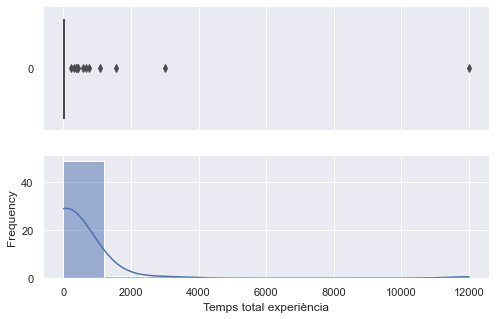

<Figure size 576x360 with 0 Axes>

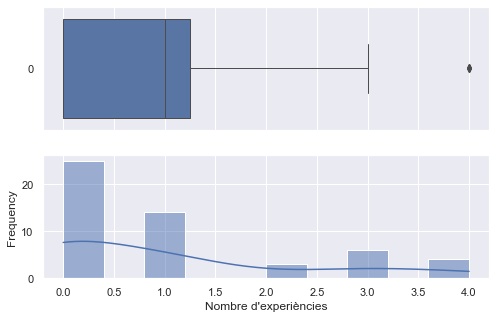

<Figure size 576x360 with 0 Axes>

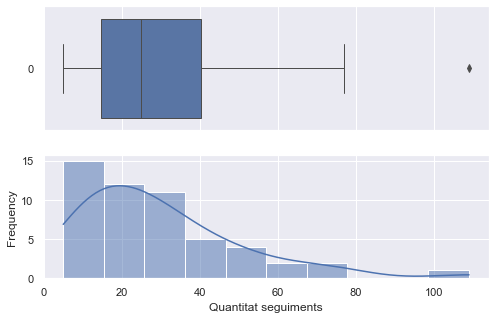

<Figure size 576x360 with 0 Axes>

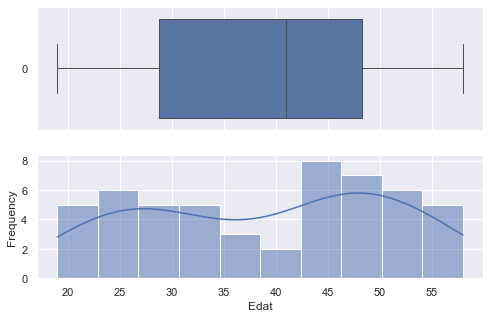

<Figure size 576x360 with 0 Axes>

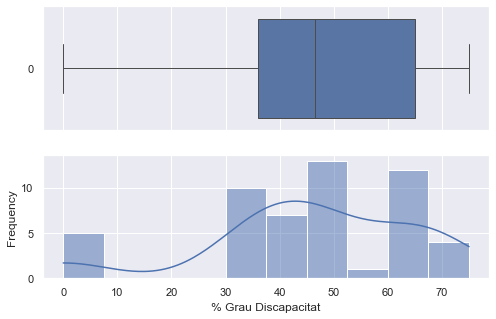

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
for i in df_p.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0, orient='h')
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

In [29]:
from scipy import stats


print('Hipotesis nula Ho -> La muestra tiene una distribución normal')
print('Hipotesis alternativa H1 -> La muestra no tiene una distribución normal\n\n')

for i in df_p.columns:
    shapiro_test = stats.shapiro(df_p[i])
    print('Por la variable ', i, "con un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('No podemos refutar la hipotesis nula\n')
    else:
        print("Podemos refutar la hipotesis nula\n")

Hipotesis nula Ho -> La muestra tiene una distribución normal
Hipotesis alternativa H1 -> La muestra no tiene una distribución normal


Por la variable  Temps total experiència con un p-value de  7.53688222400982e-15
Podemos refutar la hipotesis nula

Por la variable  Nombre d'experiències con un p-value de  8.333882561828432e-08
Podemos refutar la hipotesis nula

Por la variable  Quantitat seguiments con un p-value de  3.818343247985467e-05
Podemos refutar la hipotesis nula

Por la variable  Edat con un p-value de  0.005387767683714628
Podemos refutar la hipotesis nula

Por la variable  % Grau Discapacitat con un p-value de  0.00011578293197089806
Podemos refutar la hipotesis nula



In [30]:
from sklearn import preprocessing 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

columnsScaler =['Temps total experiència']
scaler= preprocessing.StandardScaler().fit(df[columnsScaler])
df[columnsScaler]= scaler.transform(df[columnsScaler])
columnsRobust = ["Nombre d'experiències",'Quantitat seguiments']
scaler = preprocessing.RobustScaler().fit(df[columnsRobust])
df[columnsRobust] = scaler.transform(df[columnsRobust])
columnsMinMax = ["Edat",'% Grau Discapacitat']
scaler = preprocessing.MinMaxScaler().fit(df[columnsMinMax])
df[columnsMinMax] = scaler.transform(df[columnsMinMax])


In [31]:
#convertir ID a index
df.set_index('ID', inplace=True)

In [32]:
df.dtypes

Edat                                                      float64
Nº persones a unitat familiar                               int64
Té certificat CAD                                            bool
% Grau Discapacitat                                       float64
Rep ajut econòmic?                                           bool
Presenta pluridiscapacitat?                                  bool
Pren medicació                                               bool
Porta audiòfon?                                              bool
Porta implant coclear?                                       bool
Temps total experiència                                   float64
Nombre d'experiències                                     float64
Quantitat seguiments                                      float64
Gènere_Femení                                               uint8
Gènere_Masculí                                              uint8
Tipus d'identificació_NIE                                   uint8
Tipus d'id

In [33]:
df.head()

,Edat,Nº persones a unitat familiar,Té certificat CAD,% Grau Discapacitat,Rep ajut econòmic?,Presenta pluridiscapacitat?,Pren medicació,Porta audiòfon?,Porta implant coclear?,Temps total experiència,...,Sistema de comunicació_Oral,Sistema de comunicació_Signes,Nivell formatiu_Altra formació reglada,Nivell formatiu_Batxillerat (i COU),Nivell formatiu_Educació Primària (i EGB),Nivell formatiu_Educació Secundària,Nivell formatiu_Formació Professional,Nivell formatiu_Formació no reglada,Nivell formatiu_Universitat,Temps inserció
ID,,,,,,,,,,,,,,,,,,,,,
e026d35a-d5d1-8a8f-1e3b-5bb4a04155e9,0.846154,1,True,0.440000,False,True,False,False,False,-0.24289,...,1,0,0,0,0,0,0,0,1,237 days
1156db83-09ae-9a70-c181-5bb4a0c04248,0.461538,3,True,0.453333,False,False,False,False,False,-0.24289,...,0,0,0,0,0,0,0,0,0,131 days
42ae062a-4ef9-96eb-2afc-5bb4a010654c,0.000000,4,True,0.560000,True,False,False,True,False,-0.24289,...,1,0,0,0,0,0,0,0,1,452 days
5239cfab-df6c-dc3c-366a-5bb4a0d91a9d,0.179487,2,False,1.000000,False,False,False,False,False,-0.24289,...,0,1,1,0,0,0,0,0,0,17 days
cff0e30d-321f-e53f-71bd-5bb4a0773b49,0.743590,0,False,0.000000,False,False,False,False,False,-0.24289,...,0,0,1,0,0,0,0,0,0,69 days


In [34]:
#hacemos una primera prueba con diferentes modelos regresivos
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# separar las variables independientes y la variable dependiente
X = df.drop("Temps inserció", axis=1)
y = df["Temps inserció"]

#pasar Temps inserció a int
y = y / np.timedelta64(1, 'D')

# dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# crear una lista de modelos
models = [
LinearRegression(),
Ridge(),
Lasso(),
ElasticNet(),
DecisionTreeRegressor(),
ExtraTreeRegressor(),
RandomForestRegressor(),
GradientBoostingRegressor(),
AdaBoostRegressor(),
SVR(kernel='linear'),
SVR(kernel='rbf'),
KNeighborsRegressor(),
MLPRegressor(),
GaussianProcessRegressor()
]

# entrenar y evaluar cada modelo en la lista
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(type(model).__name__)
    print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))
    print("MAE: ", mean_absolute_error(y_test, y_pred))
    print("R2: ", r2_score(y_test, y_pred))
    print()

LinearRegression
RMSE:  1172.4192258264798
MAE:  810.6383221138972
R2:  -107.57826001530938

Ridge
RMSE:  205.7598904994169
MAE:  167.45565369270594
R2:  -2.3442478369495325

Lasso
RMSE:  286.1021520890443
MAE:  203.10470347788078
R2:  -5.465755290561686

ElasticNet
RMSE:  120.93345044876766
MAE:  102.13616729191844
R2:  -0.15523384265563767

DecisionTreeRegressor
RMSE:  172.2828343161326
MAE:  157.875
R2:  -1.344558268124707

ExtraTreeRegressor
RMSE:  144.17394008627218
MAE:  127.125
R2:  -0.6419145417294068

RandomForestRegressor
RMSE:  129.90440384182517
MAE:  111.32375
R2:  -0.3329834672064378

GradientBoostingRegressor
RMSE:  164.1774916690062
MAE:  132.48439563352838
R2:  -1.1291401364154208

AdaBoostRegressor
RMSE:  120.63941641760704
MAE:  97.64685627723311
R2:  -0.14962306878276377

SVR
RMSE:  117.37445964381628
MAE:  100.50564807423763
R2:  -0.088238850815066

SVR
RMSE:  112.54724380958638
MAE:  94.35098148860403
R2:  -0.0005683070087219022

KNeighborsRegressor
RMSE:  110.645

In [35]:
#hacemos cross validation con los modelos con mejores métricas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# separar las variables independientes y la variable dependiente
X = df.drop("Temps inserció", axis=1)
y = df["Temps inserció"]

# pasar Temps inserció a int
y = y / np.timedelta64(1, 'D')

# dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# crear una lista de modelos
models = [ElasticNet(), RandomForestRegressor(), AdaBoostRegressor(),
          SVR(kernel='linear'), SVR(kernel='rbf'), KNeighborsRegressor()]

# entrenar y evaluar cada modelo en la lista con validación cruzada
for model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    mae_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(type(model).__name__)
    print("RMSE (10-fold CV): ", rmse_scores.mean())
    print("MAE (10-fold CV): ", mae_scores.mean())
    print("R2 (10-fold CV): ", r2_scores.mean())
    print()


ElasticNet
RMSE (10-fold CV):  114.97972530738257
MAE (10-fold CV):  97.70950205002154
R2 (10-fold CV):  -0.23829286153634674

RandomForestRegressor
RMSE (10-fold CV):  116.9258905070408
MAE (10-fold CV):  99.92634545454544
R2 (10-fold CV):  -0.2667818641024808

AdaBoostRegressor
RMSE (10-fold CV):  112.58915302515132
MAE (10-fold CV):  97.44710007878561
R2 (10-fold CV):  -0.08371919601575484

SVR
RMSE (10-fold CV):  117.23310812554746
MAE (10-fold CV):  97.91204064585716
R2 (10-fold CV):  -0.25808338815802545

SVR
RMSE (10-fold CV):  119.63575774877567
MAE (10-fold CV):  98.66820754067393
R2 (10-fold CV):  -0.3459917526959909

KNeighborsRegressor
RMSE (10-fold CV):  105.76536228942196
MAE (10-fold CV):  87.56690909090909
R2 (10-fold CV):  -0.006660389703218761



In [36]:
#hacemos un listado con la correlación entre características y target
corr_matrix = X_train.corrwith(y_train).sort_values(ascending=False)

Moment apareix sordesa_Prelocutiva                0.407539
Tipus d'identificació_NIF                         0.337003
Tipus pluridiscapacitat_Altres                    0.313465
Gènere_Masculí                                    0.306999
Temps total experiència                           0.283051
Nivell formatiu_Formació Professional             0.274231
Vinculació discapacitat auditiva_Afectat/da       0.205065
On sordesa_Unilateral OD                          0.193966
Causa pèrdua auditiva_Desconeguda                 0.178303
On sordesa_Biilateral                             0.161652
Té certificat CAD                                 0.158598
Quantitat seguiments                              0.141644
Nombre d'experiències                             0.140710
Nivell formatiu_Educació Primària (i EGB)         0.131588
Tipus pluridiscapacitat_Trastorn mental           0.124756
Nº persones a unitat familiar                     0.099281
Causa pèrdua auditiva_Genètica                    0.0979

In [37]:
#creamos un df con los valores absolutos mayores de 0.20
df_corr = pd.DataFrame(corr_matrix)
df_corr = df_corr.reset_index()
df_corr = df_corr.rename(columns={0: 'Valor'})
df_corr = df_corr.rename(columns={'index': 'Factor'})
df_corr.dropna()
df_corr_np = df_corr[(df_corr['Valor'] > 0.20) | (df_corr['Valor'] < -0.20)]
df_corr_np

,Factor,Valor
0,Moment apareix sordesa_Prelocutiva,0.407539
1,Tipus d'identificació_NIF,0.337003
2,Tipus pluridiscapacitat_Altres,0.313465
3,Gènere_Masculí,0.306999
4,Temps total experiència,0.283051
5,Nivell formatiu_Formació Professional,0.274231
6,Vinculació discapacitat auditiva_Afectat/da,0.205065
38,Moment apareix sordesa_Postlocutiva,-0.205108
39,"Tipus pluridiscapacitat_Física,Trastorn mental",-0.228271
40,Pren medicació,-0.255522


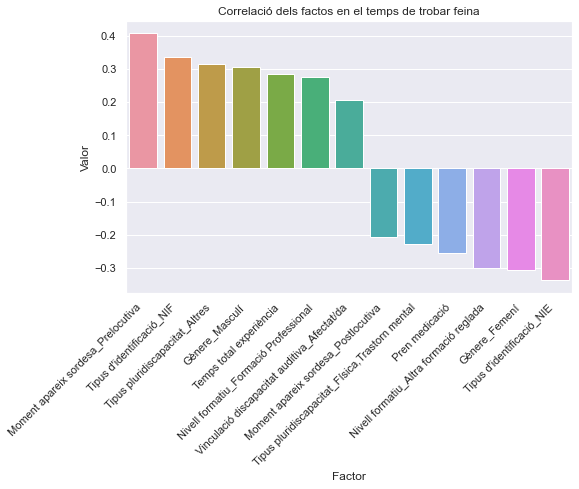

In [39]:
#graficamos el resultado
# Importar bibliotecas
import seaborn as sns
import pandas as pd

# Crear gráfico de barras utilizando Seaborn
plt.title ('Correlació dels factos en el temps de trobar feina')
ax=sns.barplot(x='Factor', y='Valor', data=df_corr_np)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()



Com podem veure el fet el moment en què apareix la sordesa sigui prelocutiva és el factor que influencia més en que una persona trigui més en trobar feina.
Per altra banda el fet de tenir NIE, ser dona i tenir un nivell formatiu "Altra formació reglada", són els factors que més impacten en disminuir el temps en trobar feina.